# Downloading data from Reddit

Using the PRAW library to get all the subreddit submissions

In [1]:
import requests
import requests.auth
import os
from pprint import pprint

REDDIT_CLIENT_ID = os.getenv("REDDIT_CLIENT_ID")
REDDIT_SECRET = os.getenv("REDDIT_SECRET")
REDDIT_USERNAME = os.getenv("REDDIT_USERNAME")
REDDIT_PASSWORD = os.getenv("REDDIT_PASSWORD")
USER_AGENT = "FusionAnalysis/0.1 by Darkbladecr"

In [2]:
# client_auth = requests.auth.HTTPBasicAuth(REDDIT_CLIENT_ID, REDDIT_SECRET)
# payload = {"grant_type": "password", "username": REDDIT_USERNAME, "password": REDDIT_PASSWORD}
# headers = {"User-Agent": USER_AGENT}
# response = requests.post("https://www.reddit.com/api/v1/access_token", auth=client_auth, params=payload, headers=headers)
# res_json = response.json()

# REDDIT_TOKEN = res_json['access_token']

In [3]:
import praw

reddit = praw.Reddit(
    client_id=REDDIT_CLIENT_ID,
    client_secret=REDDIT_SECRET,
    user_agent=USER_AGENT
)

In [4]:
subreddit = reddit.subreddit("spinalfusion")

In [5]:
for post in subreddit.new(limit=1):
    sample = vars(post)
    pprint(sample)

{'_comments_by_id': {},
 '_fetched': False,
 '_reddit': <praw.reddit.Reddit object at 0x1079b9cd0>,
 'all_awardings': [],
 'allow_live_comments': False,
 'approved_at_utc': None,
 'approved_by': None,
 'archived': False,
 'author': Redditor(name='BloodRedPlanet'),
 'author_flair_background_color': None,
 'author_flair_css_class': None,
 'author_flair_richtext': [],
 'author_flair_template_id': None,
 'author_flair_text': None,
 'author_flair_text_color': None,
 'author_flair_type': 'text',
 'author_fullname': 't2_2x25686z',
 'author_is_blocked': False,
 'author_patreon_flair': False,
 'author_premium': False,
 'awarders': [],
 'banned_at_utc': None,
 'banned_by': None,
 'can_gild': False,
 'can_mod_post': False,
 'category': None,
 'clicked': False,
 'comment_limit': 2048,
 'comment_sort': 'confidence',
 'content_categories': None,
 'contest_mode': False,
 'created': 1685557328.0,
 'created_utc': 1685557328.0,
 'discussion_type': None,
 'distinguished': None,
 'domain': 'self.spinalfus

In [15]:
keys = (
    'id',
    'created_utc',
    'permalink',
    'author',
    'title',
    'selftext',
    'view_count',
    'ups',
    'downs',
    'upvote_ratio',
    'likes',
    'all_awardings',
    'media',
    'media_embed'
)

data = {k: [] for k in keys}

for post in subreddit.new(limit=None):
    for k in keys:
        data[k].append(vars(post)[k])


In [2]:
import pandas as pd

df = pd.DataFrame.from_dict(data)

NameError: name 'data' is not defined

In [29]:
df.to_hdf('data/reddit_raw.h5', key='df', mode='w')

/var/folders/lk/lhmn07j501l6rng06tjrl8cm0000gn/T/ipykernel_69768/875824637.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['all_awardings', 'author', 'id', 'likes', 'media', 'media_embed',
       'permalink', 'title', 'selftext', 'view_count'],
      dtype='object')]

  df.to_hdf('data/raw_reddit.h5', key='df', mode='w')


## Processing DataFrame

In [12]:
import pandas as pd

df = pd.read_hdf('data/reddit_raw.h5', key='df')

In [13]:
print(df.shape)
df.head(3)

(994, 14)


,all_awardings,author,created_utc,downs,id,likes,media,media_embed,permalink,title,selftext,ups,upvote_ratio,view_count
0,[],BloodRedPlanet,1.685557e+09,0,13wtu2w,None,None,{},/r/spinalfusion/comments/13wtu2w/frontal_tempo...,"frontal temporal headaches, right side 8 weeks...","Hello,\n\nI'm getting headaches with numbness/...",1,1.0,None
1,[],engacad,1.685557e+09,0,13wtla9,None,None,{},/r/spinalfusion/comments/13wtla9/transforamina...,Transforaminal diagnostic nerve root block rec...,"I have an appointment for ""transforaminal"" Cer...",1,1.0,None
2,[],motorboaters0b,1.685556e+09,0,13wtgpv,None,None,{},/r/spinalfusion/comments/13wtgpv/just_got_told...,Just got told I need l4 and l5 360 fusion. I h...,I can add images if needed but if anyone could...,1,1.0,None


In [14]:
df['created_utc'] = df['created_utc'].apply(lambda x: pd.to_datetime(x, unit='s'))

In [22]:
df.at[9, 'selftext']

'I’ve been recently cleared for PT at 8 weeks based on the outcome of my x-ray and CT scan. However, I read some comments about doctors delaying PT, because of concerns that it could interfere with fusion.  Anyone have any insights to share on this topic?  \n\nAlso, interestingly, my surgeon did not schedule any follow ups beyond my latest imaging. He basically just said that the CT scan confirmed bone growth and the patient instructions indicate to contact him, if needed.  So that seems like that’s it…(?).  I guess that’s a positive sign.'

In [21]:
df.to_hdf('data/reddit_process.h5', key='df', mode='w')
df.to_csv('data/reddit_process.csv', encoding='utf-8-sig')

/var/folders/lk/lhmn07j501l6rng06tjrl8cm0000gn/T/ipykernel_73820/3363188970.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['all_awardings', 'author', 'id', 'likes', 'media', 'media_embed',
       'permalink', 'title', 'selftext', 'view_count'],
      dtype='object')]

  df.to_hdf('data/reddit_process.h5', key='df', mode='w')


In [6]:
f"Date range of posts: {df.iat[-1, 2]} to {df.iat[0, 2]}"

'Date range of posts: 2022-10-16 23:48:25 to 2023-05-31 18:22:08'

# Tone analysis

Checking the tone of submissions

In [3]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
from tqdm import tqdm

def init_model(model_path: str):
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    config = AutoConfig.from_pretrained(model_path)
    model = AutoModelForSequenceClassification.from_pretrained(model_path)

    return (tokenizer, config, model)

In [79]:
tone_tokenizer, tone_config, tone_model = init_model("cardiffnlp/twitter-roberta-base-sentiment-latest")


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [80]:
from scipy.special import softmax
import numpy as np

tone_labels = ['negative', 'neutral', 'positive']

def sentiment_analysis(text: str):
  encoded_input = tone_tokenizer(text, max_length=512, truncation=True, return_tensors='pt')
  output = tone_model(**encoded_input)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)

  ranking = np.argsort(scores)
  ranking = ranking[::-1]

  output = {k: 0.0 for k in tone_labels}

  for i in range(scores.shape[0]):
      k = tone_config.id2label[ranking[i]]
      output[k] = scores[ranking[i]]
  
  return output

sentiment_analysis("Covid cases are increasing fast!")

{'negative': 0.7235762, 'neutral': 0.22867934, 'positive': 0.04774447}

In [40]:
for k in tone_labels:
    df[k] = 0.0

In [41]:
for id in tqdm(df.index):
    output = sentiment_analysis(df.at[id, 'selftext'])
    for k in tone_labels:
        df.at[id, k] = output[k]

In [76]:
df['tone'] = df[tone_labels].idxmax(axis=1)

In [73]:
df.to_hdf('data/reddit_process2.h5', key='df', mode='w')
df.to_csv('data/reddit_process2.csv', encoding='utf-8-sig')

/var/folders/lk/lhmn07j501l6rng06tjrl8cm0000gn/T/ipykernel_73820/3419590272.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['all_awardings', 'author', 'id', 'likes', 'media', 'media_embed',
       'permalink', 'title', 'selftext', 'view_count', 'tone'],
      dtype='object')]

  df.to_hdf('data/reddit_process2.h5', key='df', mode='w')


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

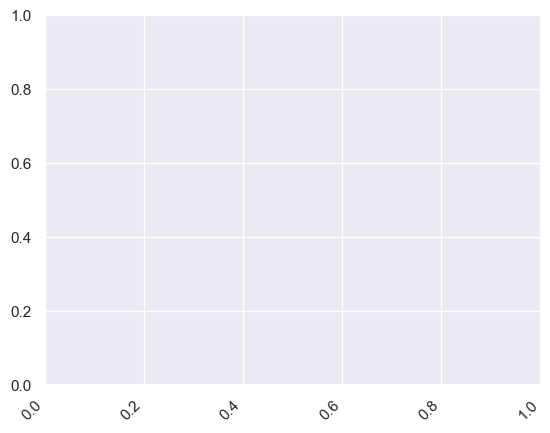

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
plt.xticks(rotation=45, ha='right')

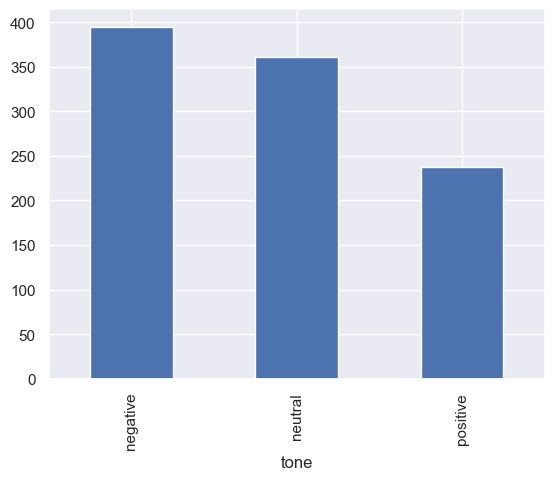

In [77]:
fig, ax = plt.subplots()
ax = df['tone'].value_counts().plot(kind='bar')

plt.show()

# Emotion Analysis

Checking the emotion of submissions

In [81]:
emotion_tokenizer, emotion_config, emotion_model = init_model("bhadresh-savani/distilbert-base-uncased-emotion")


In [84]:
from scipy.special import softmax
import numpy as np

emotion_labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

def emotion_analysis(text: str):
  encoded_input = emotion_tokenizer(text, max_length=512, truncation=True, return_tensors='pt')
  output = emotion_model(**encoded_input)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)

  ranking = np.argsort(scores)
  ranking = ranking[::-1]

  output = {k: 0.0 for k in emotion_labels}

  for i in range(scores.shape[0]):
      k = emotion_config.id2label[ranking[i]]
      output[k] = scores[ranking[i]]
  
  return output

emotion_analysis("Covid cases are increasing fast!")

{'sadness': 0.011512356,
 'joy': 0.87378865,
 'love': 0.0020575337,
 'anger': 0.082321994,
 'fear': 0.026589949,
 'surprise': 0.003729473}

In [85]:
for k in emotion_labels:
    df[k] = 0.0

In [86]:
for id in tqdm(df.index):
    output = emotion_analysis(df.at[id, 'selftext'])
    for k in emotion_labels:
        df.at[id, k] = output[k]

In [87]:
df['emotion'] = df[emotion_labels].idxmax(axis=1)

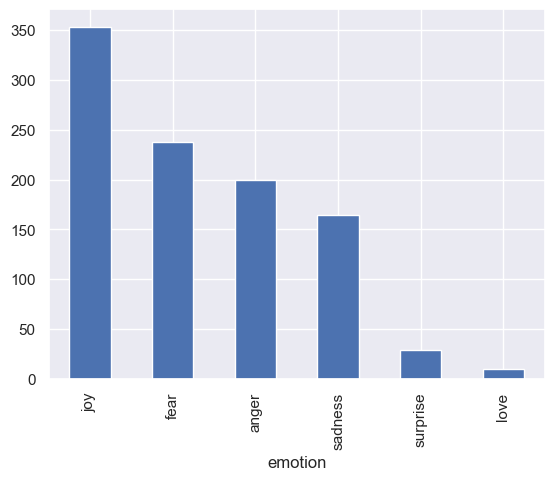

In [88]:
fig, ax = plt.subplots()
ax = df['emotion'].value_counts().plot(kind='bar')

plt.show()

In [89]:
df.to_hdf('data/reddit_process3.h5', key='df', mode='w')
df.to_csv('data/reddit_process3.csv', encoding='utf-8-sig')

/var/folders/lk/lhmn07j501l6rng06tjrl8cm0000gn/T/ipykernel_73820/4011226189.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['all_awardings', 'author', 'id', 'likes', 'media', 'media_embed',
       'permalink', 'title', 'selftext', 'view_count', 'tone', 'emotion'],
      dtype='object')]

  df.to_hdf('data/reddit_process3.h5', key='df', mode='w')


# Zero-shot classification

Classification of submissions based on certain categories

In [4]:
df = pd.read_hdf('data/reddit_process3.h5', key='df')

In [5]:
from transformers import pipeline

zs_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

In [6]:
theme_labels = ['clinical update', 'supporting the community', 'asking a question', 'educational', 'advocating for surgery', 'advising against surgery', 'other']

def theme_analysis(text: str, multi_label=False):
  res = zs_classifier(text, theme_labels, multi_label=multi_label)

  output = {k: 0.0 for k in theme_labels}

  for k, score in zip(res['labels'], res['scores']):
      output[k] = score
  
  return output

theme_analysis("Covid cases are increasing fast!")

{'clinical update': 0.5231243371963501,
 'supporting the community': 0.11439959704875946,
 'asking a question': 0.23238550126552582,
 'educational': 0.03421812877058983,
 'advocating for surgery': 0.02536778897047043,
 'advising against surgery': 0.01842709630727768,
 'other': 0.05207764729857445}

In [7]:
for k in theme_labels:
    df[k] = 0.0

In [8]:
for id in tqdm(df.index):
    selftext = df.at[id, 'selftext']
    if len(selftext) == 0:
        continue
    output = theme_analysis(selftext)
    for k in theme_labels:
        df.at[id, k] = output[k]

100%|██████████| 994/994 [38:51<00:00,  2.35s/it]  


In [9]:
df['theme'] = df[theme_labels].idxmax(axis=1)

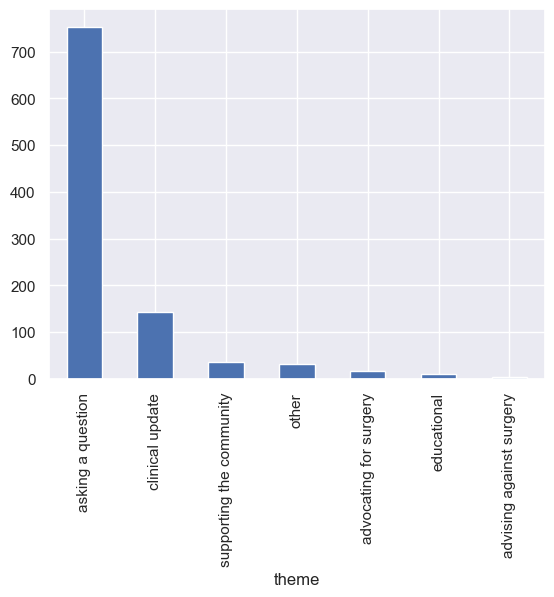

In [12]:
fig, ax = plt.subplots()
ax = df['theme'].value_counts().plot(kind='bar')

plt.show()

In [13]:
df.to_hdf('data/reddit_process4_2.h5', key='df', mode='w')
df.to_csv('data/reddit_process4_2.csv', encoding='utf-8-sig')

/var/folders/lk/lhmn07j501l6rng06tjrl8cm0000gn/T/ipykernel_87719/2136159091.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['all_awardings', 'author', 'id', 'likes', 'media', 'media_embed',
       'permalink', 'title', 'selftext', 'view_count', 'tone', 'emotion',
       'theme'],
      dtype='object')]

  df.to_hdf('data/reddit_process4_2.h5', key='df', mode='w')


# Natural Language Inference (NLI)

In NLI the model determines the relationship between two given texts. Concretely, the model takes a premise and a hypothesis and returns a class that can either be:

- **entailment**, which means the hypothesis is true.
- **contraction**, which means the hypothesis is false.
- **neutral**, which means there's no relation between the hypothesis and the premise.

### Multi-Genre NLI (MNLI)

```
Example 1:
    Premise: A man inspects the uniform of a figure in some East Asian country.
    Hypothesis: The man is sleeping.
    Label: Contradiction

Example 2:
    Premise: Soccer game with multiple males playing.
    Hypothesis: Some men are playing a sport.
    Label: Entailment
```

In [130]:
df.loc[df['selftext'] == '', ['title', 'media', 'media_embed']]

,title,media,media_embed
3,1 week post-op t5-l4 fusion! Looking for some ...,None,{}
7,I posted the other day about new shooting leg ...,None,{}
14,Anybody else get an infection and how did yall...,None,{}
23,6 weeks post ALIF 360 and on Thursday evening ...,None,{}
28,10 weeks out from L5 S1. Lifted around 8 pound...,None,{}
...,...,...,...
968,1 year post op and still struggling to lose th...,None,{}
969,Anyone have an acdf c5 - 7 to treat cervical m...,None,{}
976,Having my 3rd surgery Wednesday. Wish me luck…,None,{}
982,Three week follow up,None,{}
